In [93]:
# Packages for analysis
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

import numpy.ma as ma
import matplotlib.ticker as mticker
from matplotlib import colors as c
from matplotlib.colors import ListedColormap,BoundaryNorm
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.geodesic as cargeo
from shapely.geometry import Polygon
import os
import warnings
warnings.filterwarnings('ignore')

In [96]:
df_embedded = pd.read_excel("D:/gauge datas 2021/QPE_gauges/test_ln.xlsx",sheet_name="Stratiform3")

In [97]:
df_embedded

,Stations,times,SC_SVM,R_10p,Z_1500m,ZDR_1500m,KDP_1500m,ln_R_10p,ln_Z_1500m,ln_ZDR_1500m,ln_KDP_1500m
0,Sín Chải,16:10 05/04,1,3.6,30.73,1.58,0.12,1.280934,3.425239,0.457425,-2.120264
1,Tây Trang,16:10 05/04,1,1.2,10.95,0.60,0.02,0.182322,2.393339,-0.510826,-3.912023
2,Mường Chà,16:10 05/04,1,2.4,24.57,1.74,0.05,0.875469,3.201526,0.553885,-2.995732
3,Bình Lư 1,16:10 05/04,1,1.2,20.13,1.27,0.03,0.182322,3.002211,0.239017,-3.506558
4,Nậm Hàng 1,16:10 05/04,1,1.2,24.66,1.20,0.03,0.182322,3.205182,0.182322,-3.506558
...,...,...,...,...,...,...,...,...,...,...,...
3306,Nậm Hăn 2,22:00 25/12,1,2.4,4.26,0.86,0.01,0.875469,1.449269,-0.150823,-4.605170
3307,Nậm Sỏ,22:00 25/12,1,1.2,17.24,0.97,0.04,0.182322,2.847232,-0.030459,-3.218876
3308,Thị Trấn Tân Uyên,22:00 25/12,1,1.2,14.30,0.78,0.09,0.182322,2.660260,-0.248461,-2.407946
3309,Khun Há,22:00 25/12,1,1.2,6.57,0.61,0.01,0.182322,1.882514,-0.494296,-4.605170


In [98]:
features=['ln_Z_1500m','ln_ZDR_1500m']

In [99]:
X=df_embedded[features]

In [100]:
Y=df_embedded['ln_R_10p']

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,train_size=0.8, test_size=0.2, random_state=0)

In [109]:
from sklearn.linear_model import LinearRegression

In [110]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X_test,y_test)

0.11372731254121049

In [111]:
y_pred=regressor.predict(X_test)

In [112]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import math
print("R^2: ",r2_score(y_test, y_pred))
print("MSE: ",mean_squared_error(y_test, y_pred))
print("RMSE: ",math.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: ",mean_absolute_error(y_test, y_pred))

R^2:  0.11372731254121049
MSE:  0.7218338397726581
RMSE:  0.8496080506755207
MAE:  0.6675991403366628


In [114]:
X_test

,ln_Z_1500m,ln_ZDR_1500m
2716,3.172203,0.067659
701,2.898671,-0.051293
3132,3.247658,0.076961
1196,2.919391,-0.597837
3089,3.458837,0.270027
...,...,...
1129,2.683074,-0.562119
3201,2.916689,0.329304
2791,2.937043,-0.314711
1572,3.282789,0.231112


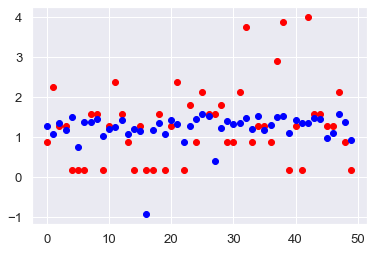

In [123]:
#Plot predicted values
plt.scatter(range(0,len(y_test[0:50])), y_test[0:50], color = 'red', label = 'Predicted Value')
plt.scatter(range(0,len(y_pred[0:50])), y_pred[0:50], color = 'blue', label = 'Predicted Value')
#Plot the regression line
#plt.plot(X_train, regressor.predict(X_train), color = 'blue', label = 'Linear Regression')
#Label the Plot
#plt.title('Salary vs Experience (Test Set)')
#plt.xlabel('Years of Experience')
#plt.ylabel('Salary')
#Show the plot
#plt.show()

In [120]:
range(0,len(y_test))

range(0, 663)

In [124]:
y_pred.min()

-2.4141561479681966

In [125]:
y_test.min()

0.1823215567939546